In [1]:
#Scikit-learn

#Regression : The term regression is used when you try to find the relationship between variables.
#In Machine Learning, and in statistical modeling, that relationship is used to predict the outcome of future events.

#Linear Regression : Linear regression uses the relationship between the data-points to draw a straight line through all them and can be used to predict future values.


# Example : A machine learning model that can predict the mpg of any car that comes to their garage.
import pandas as pd
df = pd.read_csv('auto_mpg.csv')

print(df.head())
#droping null vaues
df.dropna(inplace = True)
df.info()

#The target variable is 'mpg' which has to be predicted.
#The predictors are the variables that are used to predict the target

#Creating matrix of predictors
X = df.iloc[:, 1:8]
#Creating array target
y = df.iloc[:, 0]

print(X.head())

#Since the origin feature is a categorical variable i.e. a string data,  get_dummies function can be used from Pandas to encode it
X = pd.get_dummies(X)
print("Dataframe after encoding the columns which is not float = \n", X)

#The data must be divided into two parts. First, a training set on which model can be trained.
#Second, a testing set on which the model can be validated.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#Standardisation. i.e. Since all the variables in the data are with different units of measurements and different scales,
#it would be a good idea to standardize them. A standard scaler performs this operation by transforming the columns
#such that the mean of every column or variable is 0 and standard deviation is 1.

#Applying standard scaler on the data
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
S_X_train = scale.fit_transform(X_train)
S_X_test = scale.transform(X_test)

print("Dataframe after scaling the data = \n1. Training data : ", S_X_train, "\n2. Testing data : ", S_X_test)

#The linear regression model is used to build the model. A linear regression model uses the following equation:
#y = B0 + B1*X1 + B2*X2 + _ _ _ _ + Bn*Xn
#In this case, y refers to the target and X1,X2…..Xn refer to the predictors.
#B0 is the intercept  and B1,B2…..Bn are the coefficients.

#Importing and fitting the model on training set
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
#Fitting the model on training data :
reg.fit(S_X_train, y_train)
#Checking the coefficient(slope) and intercept. 
#'m' represents the coefficient and 'c' represents the intercept.
m = reg.coef_
c = reg.intercept_
print("Coefficient and Intercept = \n", m, c)
#Predicting the target: mpg against the predictors in the training data set
#Predicted data stored in y_pred_train
y_pred_train = reg.predict(S_X_train)
#Predicting the target: mpg against the predictors in the testing data set
#Predicted data stored in y_pred_test
y_pred_test = reg.predict(S_X_test)

#R Square score.
#Prediction Accuracy in terms of how close is the predicted value of target: mpg to the real value in training data set
from sklearn.metrics import r2_score
r2_S = r2_score(y_train, y_pred_train)
print("Accuracy against training data = \n", r2_S)
# Prediction Accuracy in terms of how close the predicted value of target: mpg
# to the real value in testing data set
r2_S = r2_score(y_test, y_pred_test)
print("Accuracy against testing data = \n", r2_S)

C:\Users\tamoc\AppData\Local\Temp\ipykernel_3380\2098963006.py:10: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino  
<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   dis

In [40]:
#Encoding : One hot encoding is a technique that we use to represent categorical variables as numerical values in a machine learning model.

#One Hot Encoding using Sci-kit Learn Library.
# importing libraries 
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import OneHotEncoder 

# Retrieving data 
data = pd.read_csv('auto_mpg.csv') 

# Converting type of columns to category 
data['name'] = data['name'].astype('category') 
data['origin'] = data['origin'].astype('category') 


# Assigning numerical values and storing it in another columns 
data['name_new'] = data['name'].cat.codes 
data['origin_new'] = data['origin'].cat.codes 


# Create an instance of One-hot-encoder 
enc = OneHotEncoder() 

# Passing encoded columns 

enc_data = pd.DataFrame(enc.fit_transform( 
	data[['name_new', 'origin_new']]).toarray()) 

# Merge with main 
New_df = data.join(enc_data) 

print(New_df) 


# One-Hot Encoding of Categorical Column Using Pandas library. Example -
one_hot_encoded_data = pd.get_dummies(data, columns = ['origin', 'name']) 
print(one_hot_encoded_data)


      mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0    3504          12.0   
1    15.0          8         350.0       165.0    3693          11.5   
2    18.0          8         318.0       150.0    3436          11.0   
3    16.0          8         304.0       150.0    3433          12.0   
4    17.0          8         302.0       140.0    3449          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0    2790          15.6   
394  44.0          4          97.0        52.0    2130          24.6   
395  32.0          4         135.0        84.0    2295          11.6   
396  28.0          4         120.0        79.0    2625          18.6   
397  31.0          4         119.0        82.0    2720          19.4   

     model_year  origin                       name  name_new  ...  298  299  \
0            70     usa  chevrolet chevelle malibu      

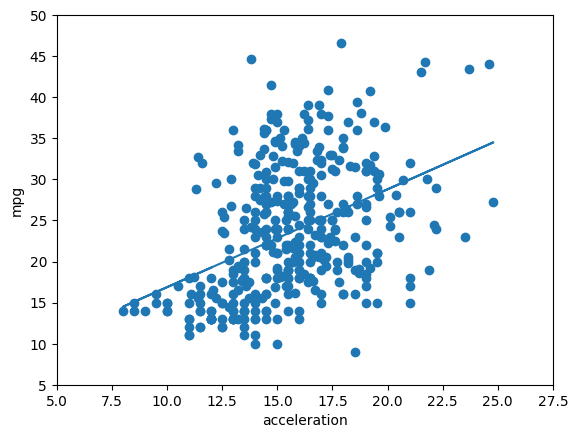

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     84.96
Date:                Wed, 28 Feb 2024   Prob (F-statistic):           1.82e-18
Time:                        21:09:42   Log-Likelihood:                -1343.9
No. Observations:                 398   AIC:                             2692.
Df Residuals:                     396   BIC:                             2700.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        4.9698      2.043      2.432   

In [6]:
#Linear Regression Example:
#It uses the relationship between the data-points to draw a straight line through all them.

import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.formula.api as smf

df = pd.read_csv('auto_mpg.csv', header=0, sep=",")

x = df["acceleration"]
y = df ["mpg"]

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
 return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, slope * x + intercept)
plt.ylim(ymin=5, ymax=50)
plt.xlim(xmin=5, xmax=27.5)
plt.xlabel("acceleration")
plt.ylabel ("mpg")
plt.show()

model = smf.ols('mpg ~ acceleration', data = df)
results = model.fit()
print(results.summary())

print("Summary the linear regression function with acceleration as explanatory variable: \nCoefficient of 1.1912, which means that acceleration has minor effect on mpg.\nLow P-value (0.0), which means that there is a relationship between acceleration and mpg.\nR-Squared value of 0.177, which means that the linear regression function line is not close to many of the data points.")
print("Conclusion : Acceleration has some effect on mpg.")
#A high Coefficient value means it has an effect on dependent variable.
#A high P-value (> 0.05) means that we cannot conclude that the explanatory variable affects the dependent variable.
#A high R-Squared value means that many data points are close to the linear regression function line.
#A low R-Squared value means that the linear regression function line does not fit the data well.


In [7]:
from scipy.optimize import root
from scipy.optimize import minimize
from math import cos

def eqn1(x):
  return x + cos(x)

myroot = root(eqn1, 0)

print(myroot.x)

def eqn2(x):
  return x**2 + x + 2

mymin = minimize(eqn2, 0, method='BFGS')

print(mymin)

[-0.73908513]
  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 1.75
        x: [-5.000e-01]
      nit: 2
      jac: [ 0.000e+00]
 hess_inv: [[ 5.000e-01]]
     nfev: 8
     njev: 4


C:\Users\tamoc\AppData\Local\Temp\ipykernel_3380\1745405581.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return x + cos(x)


In [8]:
import numpy as np
from scipy.sparse.csgraph import connected_components, dijkstra, floyd_warshall, bellman_ford
from scipy.sparse import csr_matrix

arr = np.array([
  [0, 1, 2],
  [1, 0, 0],
  [2, 0, 0]
])

newarr = csr_matrix(arr)

print("connected_components = \n", connected_components(newarr))
print("dijkstra = \n", dijkstra(newarr, return_predecessors=True, indices=0))
print("floyd_warshall = \n", floyd_warshall(newarr, return_predecessors=True))
print("bellman_ford = \n", bellman_ford(newarr, return_predecessors=True, indices=0))


connected_components = 
 (1, array([0, 0, 0]))
dijkstra = 
 (array([0., 1., 2.]), array([-9999,     0,     0]))
floyd_warshall = 
 (array([[0., 1., 2.],
       [1., 0., 3.],
       [2., 3., 0.]]), array([[-9999,     0,     0],
       [    1, -9999,     0],
       [    2,     0, -9999]]))
bellman_ford = 
 (array([0., 1., 2.]), array([-9999,     0,     0]))


In [9]:
import numpy as np
from scipy.sparse.csgraph import depth_first_order, breadth_first_order
from scipy.sparse import csr_matrix

arr = np.array([
  [0, 1, 0, 1],
  [1, 1, 1, 1],
  [2, 1, 1, 0],
  [0, 1, 0, 1]
])

newarr = csr_matrix(arr)

print("depth_first_order = \n", depth_first_order(newarr, 1))
print("breadth_first_order = \n", breadth_first_order(newarr, 1))

depth_first_order = 
 (array([1, 0, 3, 2]), array([    1, -9999,     1,     0]))
breadth_first_order = 
 (array([1, 0, 2, 3]), array([    1, -9999,     1,     1]))


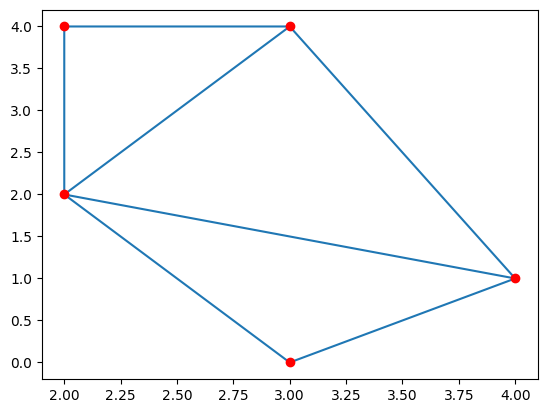

In [10]:
#Spatial Data : Spatial data refers to data that is represented in a geometric space.

#1. Triangulation : A Triangulation of a polygon is to divide the polygon into multiple triangles with which we can compute an area of the polygon.

import numpy as np
from scipy.spatial import Delaunay
import matplotlib.pyplot as plt

points = np.array([
  [2, 4],
  [3, 4],
  [3, 0],
  [2, 2],
  [4, 1]
])

simplices = Delaunay(points).simplices

plt.triplot(points[:, 0], points[:, 1], simplices)
plt.scatter(points[:, 0], points[:, 1], color='r')

plt.show()

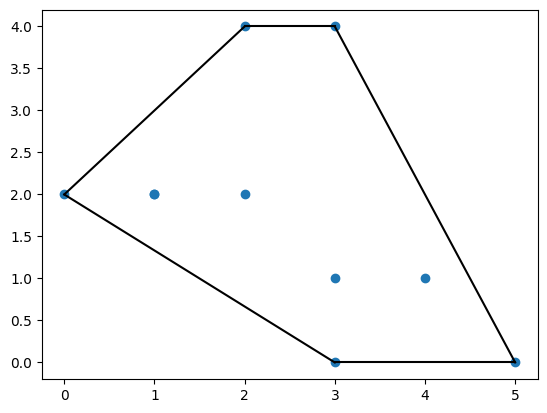

In [11]:
#2. Convex Hull : A convex hull is the smallest polygon that covers all of the given points.

import numpy as np
from scipy.spatial import ConvexHull
import matplotlib.pyplot as plt

points = np.array([
  [2, 4],
  [3, 4],
  [3, 0],
  [2, 2],
  [4, 1],
  [1, 2],
  [5, 0],
  [3, 1],
  [1, 2],
  [0, 2]
])

hull = ConvexHull(points)
hull_points = hull.simplices

plt.scatter(points[:,0], points[:,1])
for simplex in hull_points:
  plt.plot(points[simplex,0], points[simplex,1], 'k-')

plt.show()

Euclidean =  9.219544457292887
Cityblock =  11
Cosine =  0.019419324309079777


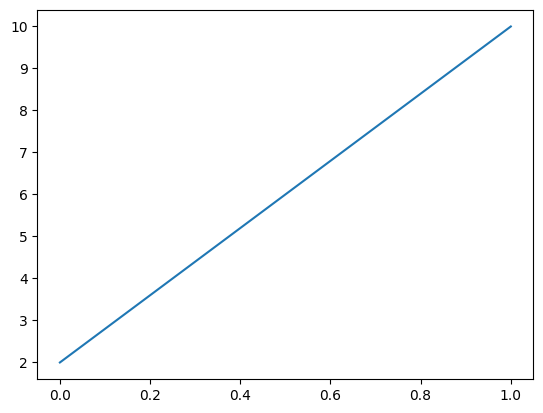

In [12]:
#Eucliean Distance : Shortest path between two points.
#Cityblock Distance : Distance computed using 4 degrees of movement i.e. we can only move: up, down, right, or left
#Cosine Distance : Cosine angle between the two points A and B.

from scipy.spatial.distance import euclidean, cityblock, cosine
import matplotlib.pyplot as plt

p1 = (1, 0)
p2 = (10, 2)

plt.plot(p1,p2)
print("Euclidean = ", euclidean(p1, p2))
print("Cityblock = ", cityblock(p1, p2))
print("Cosine = ", cosine(p1, p2))


In [13]:
#Import and export Matlab array

from scipy import io
import numpy as np

arr = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9,])

# Export:
io.savemat('arr.mat', {"vec": arr})

# Import:
mydata = io.loadmat('arr.mat', squeeze_me=True)     

#the array originally was 1D, but on extraction it increased by another dimension. squeeze_me is used to resolve that.

print("All data :\n", mydata)

print("Just the array :\n", mydata['vec'])

All data :
 {'__header__': b'MATLAB 5.0 MAT-file Platform: nt, Created on: Wed Feb 28 21:10:03 2024', '__version__': '1.0', '__globals__': [], 'vec': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])}
Just the array :
 [0 1 2 3 4 5 6 7 8 9]


In [14]:
#Interpolation is a method for generating points between given points.
#It takes x and y points and returns a callable function that can be called with new x and returns corresponding y.
#We can't call interp_func() with values higher than , or less than 0.

from scipy.interpolate import interp1d
import numpy as np
from scipy.interpolate import UnivariateSpline

xs1 = np.arange(10)

print("A range of number from 0 to 9 :\n", np.arange(10))

xs2 = np.arange(10)

ys1 = 2*xs1 + 1

interp_func1 = interp1d(xs1, ys1)

newarr1 = interp_func1(np.arange(0, 10, 1))   #0 to 10 with a gap of 1 between them.

print("xs and ys interpolate values from 2.1, 2.2... to 2.9 :\n", newarr1)

ys2 = xs2**2 + np.sin(xs2) + 1

interp_func1 = UnivariateSpline(xs2, ys2)

newarr2 = interp_func1(np.arange(2.1, 3, 0.1))

print("Univariate spline interpolation :\n", newarr2)


A range of number from 0 to 9 :
 [0 1 2 3 4 5 6 7 8 9]
xs and ys interpolate values from 2.1, 2.2... to 2.9 :
 [ 1.  3.  5.  7.  9. 11. 13. 15. 17. 19.]
Univariate spline interpolation :
 [5.62826474 6.03987348 6.47131994 6.92265019 7.3939103  7.88514634
 8.39640439 8.92773053 9.47917082]


In [39]:
#SciPy Statistical Significance Tests:

#1. T-test : T-tests are used to determine if there is significant deference between means of two variables and lets us know if they belong to the same distribution.
import numpy as np
from scipy.stats import describe
from scipy.stats import ttest_ind

v1 = np.random.normal(size=100)
v2 = np.random.normal(size=100)

res = ttest_ind(v1, v2)

print("T-test result = ", res)
print("P-value = ", res.pvalue)

#2. KS-test : KS test is used to check if given values follow a distribution.
from scipy.stats import kstest

res = kstest(v1, 'norm')

print("KS-test result = ", res)
print("Statistical description of the values in the array v1 = \n", describe(v1))

#3. Normal Test : The normaltest() function returns p value for the null hypothesis. Normality tests are based on the skewness and kurtosis.
from scipy.stats import normaltest

v = np.random.normal(size=100)

print(normaltest(v1))




T-test result =  TtestResult(statistic=-1.101320150930654, pvalue=0.27209434875630223, df=198.0)
P-value =  0.27209434875630223
KS-test result =  KstestResult(statistic=0.07386543038463422, pvalue=0.6194155770743041, statistic_location=0.693922422902809, statistic_sign=1)
Statistical description of the values in the array v1 = 
 DescribeResult(nobs=100, minmax=(-2.8170796920297443, 2.356037649210733), mean=-0.10922693790477216, variance=1.0284731623725563, skewness=-0.2721120139588829, kurtosis=-0.13894083941946667)
NormaltestResult(statistic=1.358090763222622, pvalue=0.5071008491750834)


R-square score for the model =  0.9432150416451026
The result 0.94 shows that there is a very good relationship, and we can use polynomial regression in future predictions.


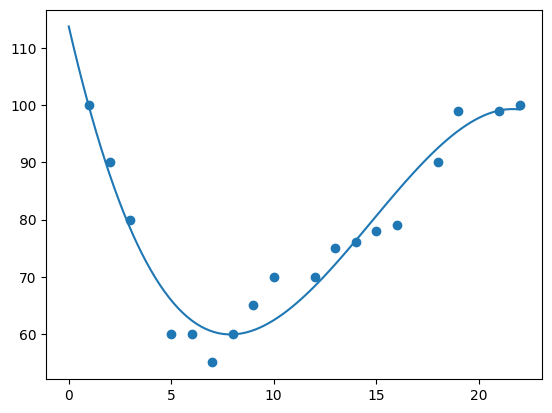

In [15]:
#Polynomial Regression Example:
#Like linear regression, it uses the relationship between the variables x and y to find the best way to draw a line through the data points.

import numpy
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

mymodel = numpy.poly1d(numpy.polyfit(x, y, 3))

myline = numpy.linspace(0, 22, 100)

R_square = r2_score(y, mymodel(x))

print("R-square score for the model = ", R_square)
print("The result 0.94 shows that there is a very good relationship, and we can use polynomial regression in future predictions.")
plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
plt.show()

In [16]:
#Multiple Regression Example:
#Multiple regression is like linear regression, but with more than one independent value.
#i.e. trying to predict a value based on two or more variables.

import pandas
from sklearn import linear_model

df = pandas.read_csv("data (car emission).csv")

print("Dataframe head : \n", df.head())

X = df[['Weight', 'Volume']]
y = df['CO2']

regr = linear_model.LinearRegression()
regr.fit(X, y)

print("Coefficient = ", regr.coef_)

#predict the CO2 emission of a car where the weight is 2300kg, and the volume is 1300cm3:
predictedCO2 = regr.predict([[2300, 1300]])

print("Pridicted CO2 value = ", predictedCO2)

Dataframe head : 
           Car       Model  Volume  Weight  CO2
0      Toyoty        Aygo    1000     790   99
1  Mitsubishi  Space Star    1200    1160   95
2       Skoda      Citigo    1000     929   95
3        Fiat         500     900     865   90
4        Mini      Cooper    1500    1140  105
Coefficient =  [0.00755095 0.00780526]
Pridicted CO2 value =  [107.2087328]


C:\Users\tamoc\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [17]:
#The standardization method uses this formula: z = (x - u) / s
#Where z is the new value, x is the original value, u is the mean and s is the standard deviation.

import numpy
import pandas

df = pandas.read_csv("data (car emission).csv")

s_V = numpy.std(df['Volume'])
m_V = numpy.mean(df['Volume'])
s_W = numpy.std(df['Weight'])
s_W = numpy.mean(df['Weight'])

print("Std for Volume = ", s_V)
print("Mean for Volume = ", m_V)
print("Std for Weight = ", s_V)
print("Mean for Weight = ", m_V)

Std for Volume =  383.53456875762674
Mean for Volume =  1611.111111111111
Std for Weight =  383.53456875762674
Mean for Weight =  1611.111111111111


In [18]:
#By applying standard scaling:

import pandas
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler

df = pandas.read_csv("data (car emission).csv")

print("Dataframe head : \n", df.head())

X = df[['Weight', 'Volume']]
y = df['CO2']

scale = StandardScaler()
scaledX = scale.fit_transform(X)

regr = linear_model.LinearRegression()
regr.fit(scaledX, y)

print("Coefficient = ", regr.coef_)

#predict the CO2 emission of a car where the weight is 2300kg, and the volume is 1300cm3:
scaled = scale.transform([[2300, 1300]])

predictedCO2 = regr.predict([scaled[0]]) #i.e. predictedCO2 = regr.predict([[4.22, -0.811]])

print("Pridicted CO2 value = ", predictedCO2)

Dataframe head : 
           Car       Model  Volume  Weight  CO2
0      Toyoty        Aygo    1000     790   99
1  Mitsubishi  Space Star    1200    1160   95
2       Skoda      Citigo    1000     929   95
3        Fiat         500     900     865   90
4        Mini      Cooper    1500    1140  105
Coefficient =  [1.80269333 2.99358608]
Pridicted CO2 value =  [107.2087328]


C:\Users\tamoc\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


R-square score for the model =  0.16414707118602123
The smaller the value, the less significant the x is to y. And the less accurate the pridicted value will be.
Pridicted CO2 emission for vahicle with weight 1900 =  112.94906771473464


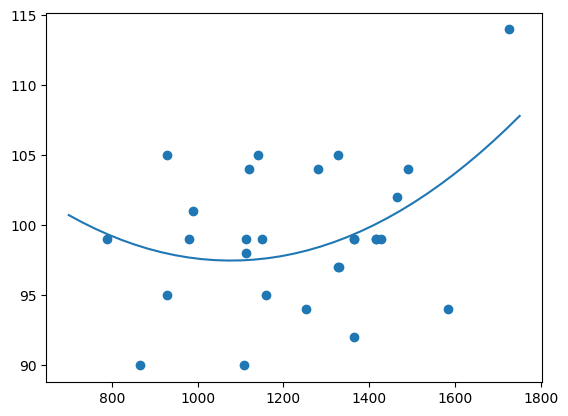

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

df = pd.read_csv("data (car emission).csv")

x = df['Weight']
y = df['CO2']

train_x = x[:28]
train_y = y[:28]

test_x = x[28:]
test_y = y[28:]

mymodel = np.poly1d(np.polyfit(train_x, train_y, 2))  #degree of the polynomial (I haven't still figure it out.)

r2 = r2_score(train_y, mymodel(train_x))

print("R-square score for the model = ", r2)
print("The smaller the value, the less significant the x is to y. And the less accurate the pridicted value will be.")
print("Pridicted CO2 emission for vahicle with weight 1900 = ", mymodel(1900))

myline = np.linspace(700, 1750, 35)

plt.scatter(train_x, train_y)
plt.plot(myline, mymodel(myline))
plt.show()

In [20]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.DataFrame({'column': [1, 2, 3]})
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['column']])

print(scaled_data)

# Remove square brackets using str() and replace() methods
scaled_data_without_brackets = str(scaled_data).replace('[', '').replace(']', '')

# Print the scaled data without square brackets
print(scaled_data_without_brackets)

[[-1.22474487]
 [ 0.        ]
 [ 1.22474487]]
-1.22474487
  0.        
  1.22474487


C:\Users\tamoc\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


[0]


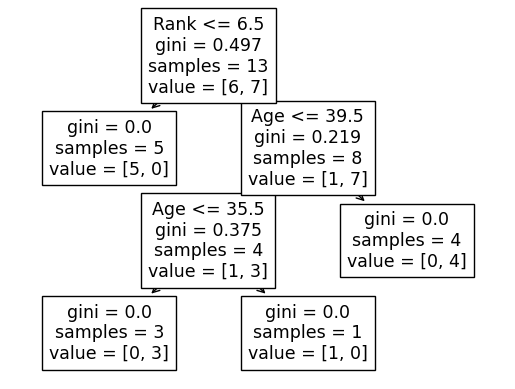

In [21]:
#Decision Tree Example:

import pandas
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

df = pandas.read_csv("comedy_data.csv")

d = {'UK': 0, 'USA': 1, 'N': 2}
df['Nationality'] = df['Nationality'].map(d)
d = {'YES': 1, 'NO': 0}
df['Go'] = df['Go'].map(d)

features = ['Age', 'Exp', 'Rank', 'Nationality']

X = df[features]
y = df['Go']

dtree = DecisionTreeClassifier()
dtree = dtree.fit(X, y)

tree.plot_tree(dtree, feature_names=features)

# Rank <= 6.5 means that every comedian with a rank of 6.5 or lower will follow the True arrow (to the left), and the rest will follow the False arrow (to the right).

# gini = 0.497 refers to the quality of the split, and is always a number between 0.0 and 0.5, where 0.0 would mean all of the samples got the same result, and 0.5 would mean that the split is done exactly in the middle.

# samples = 13 means that there are 13 comedians left at this point in the decision, which is all of them since this is the first step.

# value = [6, 7] means that of these 13 comedians, 6 will get a "NO", and 7 will get a "GO".

#You will see that the Decision Tree gives you different results if you run it enough times, even if you feed it with the same data.

#That is because the Decision Tree does not give us a 100% certain answer. It is based on the probability of an outcome, and the answer will vary.


print(dtree.predict([[40, 10, 6, 1]]))


In [22]:
#Logistic Regression : Logistic regression aims to solve classification problems. It does this by predicting categorical outcomes, unlike linear regression that predicts a continuous outcome.
#In the simplest case there are two outcomes, which is called binomial, an example of which is predicting if a tumor is malignant or benign.
# Other cases have more than two outcomes to classify, in this case it is called multinomial. A common example for multinomial logistic regression would be predicting the class of an iris flower between 3 different species.

import numpy
from sklearn import linear_model

#Reshaped for Logistic function.
X = numpy.array([3.78, 2.44, 2.09, 0.14, 1.72, 1.65, 4.92, 4.37, 4.96, 4.52, 3.69, 5.88]).reshape(-1,1)
y = numpy.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

logr = linear_model.LogisticRegression()
logr.fit(X,y)

#predict if tumor is cancerous where the size is 3.46mm:
predicted = logr.predict(numpy.array([3.46]).reshape(-1,1))     #.reshape(-1,1) is to turn the array into 1D.
print(predicted)

def logit2prob(logr, X):
  log_odds = logr.coef_ * X + logr.intercept_
  odds = numpy.exp(log_odds)
  probability = odds / (1 + odds)
  return(probability)

print(logit2prob(logr, X))

[0]
[[0.60749168]
 [0.19267555]
 [0.12774788]
 [0.00955056]
 [0.08037781]
 [0.0734485 ]
 [0.88362857]
 [0.77901203]
 [0.88924534]
 [0.81293431]
 [0.57718238]
 [0.96664398]]


In [23]:
#Grid Search : The majority of machine learning models contain parameters that can be adjusted to vary how the model learns.
#One method is to try out different values and then pick the value that gives the best score. This technique is known as a grid search.
#Higher values of C tell the model, the training data resembles real world information, place a greater weight on the training data.

from sklearn import datasets
from sklearn.linear_model import LogisticRegression

iris = datasets.load_iris()

X = iris['data']
y = iris['target']

logit = LogisticRegression(max_iter = 10000)

C = [0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2]

scores = []

for choice in C:
  logit.set_params(C=choice)
  logit.fit(X, y)
  scores.append(logit.score(X, y))

print(scores)

[0.9666666666666667, 0.9666666666666667, 0.9733333333333334, 0.9733333333333334, 0.98, 0.98, 0.9866666666666667, 0.9866666666666667]


In [24]:
#Categorical Data : When your data has categories represented by strings, it will be difficult to use them to train machine learning models which often only accepts numeric data.
#One Hot Encoding : To fix this issue, we must have a numeric representation of the categorical variable.
#Python Pandas module has a function that called get_dummies() which does one hot encoding.

import pandas
from sklearn import linear_model

cars = pandas.read_csv("data (car emission).csv")
print(cars.head())

#ohe_cars = pandas.get_dummies(cars[['Car']])
#or
ohe_cars = pandas.get_dummies(cars)


#X = pandas.concat([cars[['Volume', 'Weight']], ohe_cars], axis=1)
X = df.iloc[:, 0:4]
y = cars['CO2']

print(X.head())

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ohe_cars, y, test_size = 0.2, random_state = 0)

print(X_train.head())

from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
S_X_train = scale.fit_transform(X_train)
S_X_test = scale.transform(X_test)

regr = linear_model.LinearRegression()
regr.fit(S_X_train,y_train)

print("Test target dataframe head : ", y_test)

predictedCO2_test = regr.predict(S_X_test)

print("Test data predicted CO2 : ", predictedCO2_test)

          Car       Model  Volume  Weight  CO2
0      Toyoty        Aygo    1000     790   99
1  Mitsubishi  Space Star    1200    1160   95
2       Skoda      Citigo    1000     929   95
3        Fiat         500     900     865   90
4        Mini      Cooper    1500    1140  105
   Age  Exp  Rank  Nationality
0   36   10     9            0
1   42   12     4            1
2   23    4     6            2
3   52    4     4            1
4   43   21     8            1
    Volume  Weight  CO2  Car_Audi  Car_BMW  Car_Fiat  Car_Ford  Car_Honda  \
11    1300     990  101     False    False     False     False      False   
29    2000    1705  114     False     True     False     False      False   
27    2000    1725  114      True    False     False     False      False   
35    2500    1395  120     False    False     False     False      False   
33    1600    1390  108     False     True     False     False      False   

    Car_Hundai  Car_Hyundai  ...  Model_Octavia  Model_Rapid  Model_S

Number of appropriate clusters is determined from the plot(In this case '2').


<Figure size 640x480 with 0 Axes>

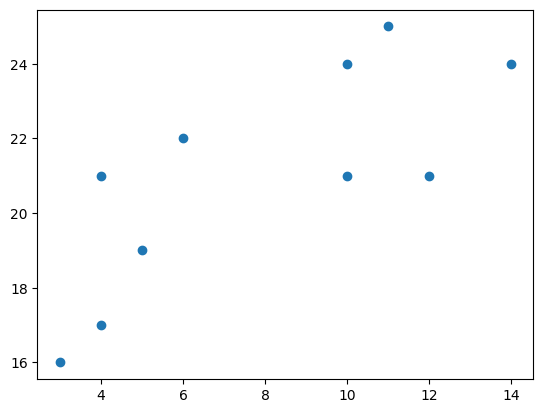

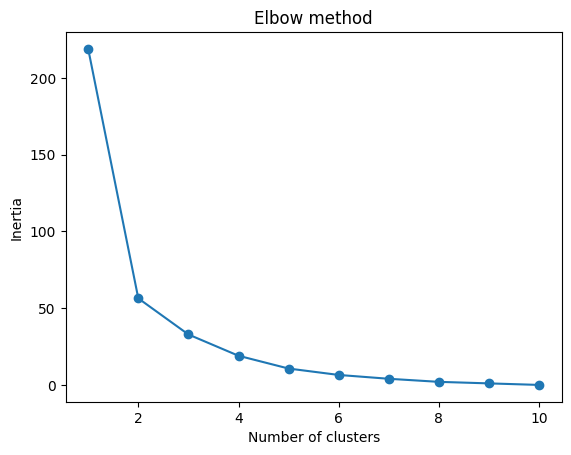

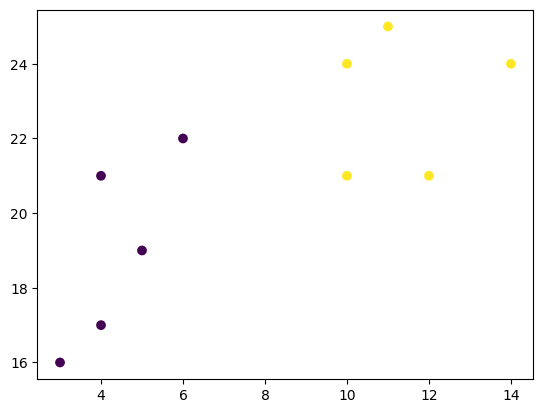

<Figure size 640x480 with 0 Axes>

In [25]:
#K-means : It is an unsupervised learning method for clustering data points. It basically organizes the data into multiple groups of similar data.
# The algorithm iteratively divides data points into K clusters by minimizing the variance in each cluster.

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]

plt.scatter(x, y)
plt.figure()
#plt.show()

data = list(zip(x, y))
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.figure()

print("Number of appropriate clusters is determined from the plot(In this case '2').")

kmeans = KMeans(n_clusters=2)
kmeans.fit(data)

plt.scatter(x, y, c=kmeans.labels_)
plt.figure()

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                  

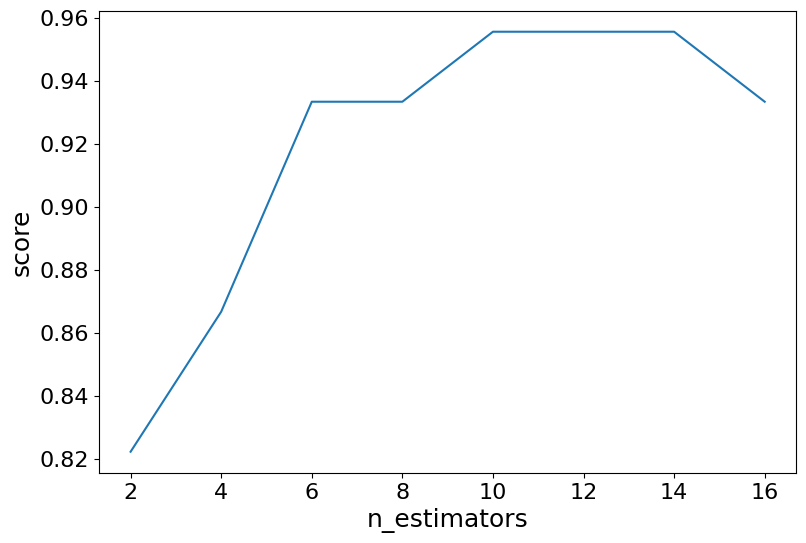

By iterating through different values for the number of estimators we can see an increase in model performance from 82.2% to 95.5%.
Out-of-box score :  0.9398496240601504


[Text(0.4583333333333333, 0.875, 'proline <= 727.5\ngini = 0.611\nsamples = 82\nvalue = [54, 60, 19]'),
 Text(0.25, 0.625, 'flavanoids <= 1.335\ngini = 0.339\nsamples = 47\nvalue = [0, 58, 16]'),
 Text(0.16666666666666666, 0.375, 'hue <= 0.92\ngini = 0.266\nsamples = 15\nvalue = [0, 3, 16]'),
 Text(0.08333333333333333, 0.125, 'gini = 0.0\nsamples = 13\nvalue = [0, 0, 16]'),
 Text(0.25, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 3, 0]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 32\nvalue = [0, 55, 0]'),
 Text(0.6666666666666666, 0.625, 'flavanoids <= 1.605\ngini = 0.159\nsamples = 35\nvalue = [54, 2, 3]'),
 Text(0.5, 0.375, 'color_intensity <= 4.325\ngini = 0.375\nsamples = 3\nvalue = [0, 1, 3]'),
 Text(0.4166666666666667, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.5833333333333334, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 3]'),
 Text(0.8333333333333334, 0.375, 'magnesium <= 147.0\ngini = 0.036\nsamples = 32\nvalue = [54, 1, 0]'),
 Text(0.75, 0

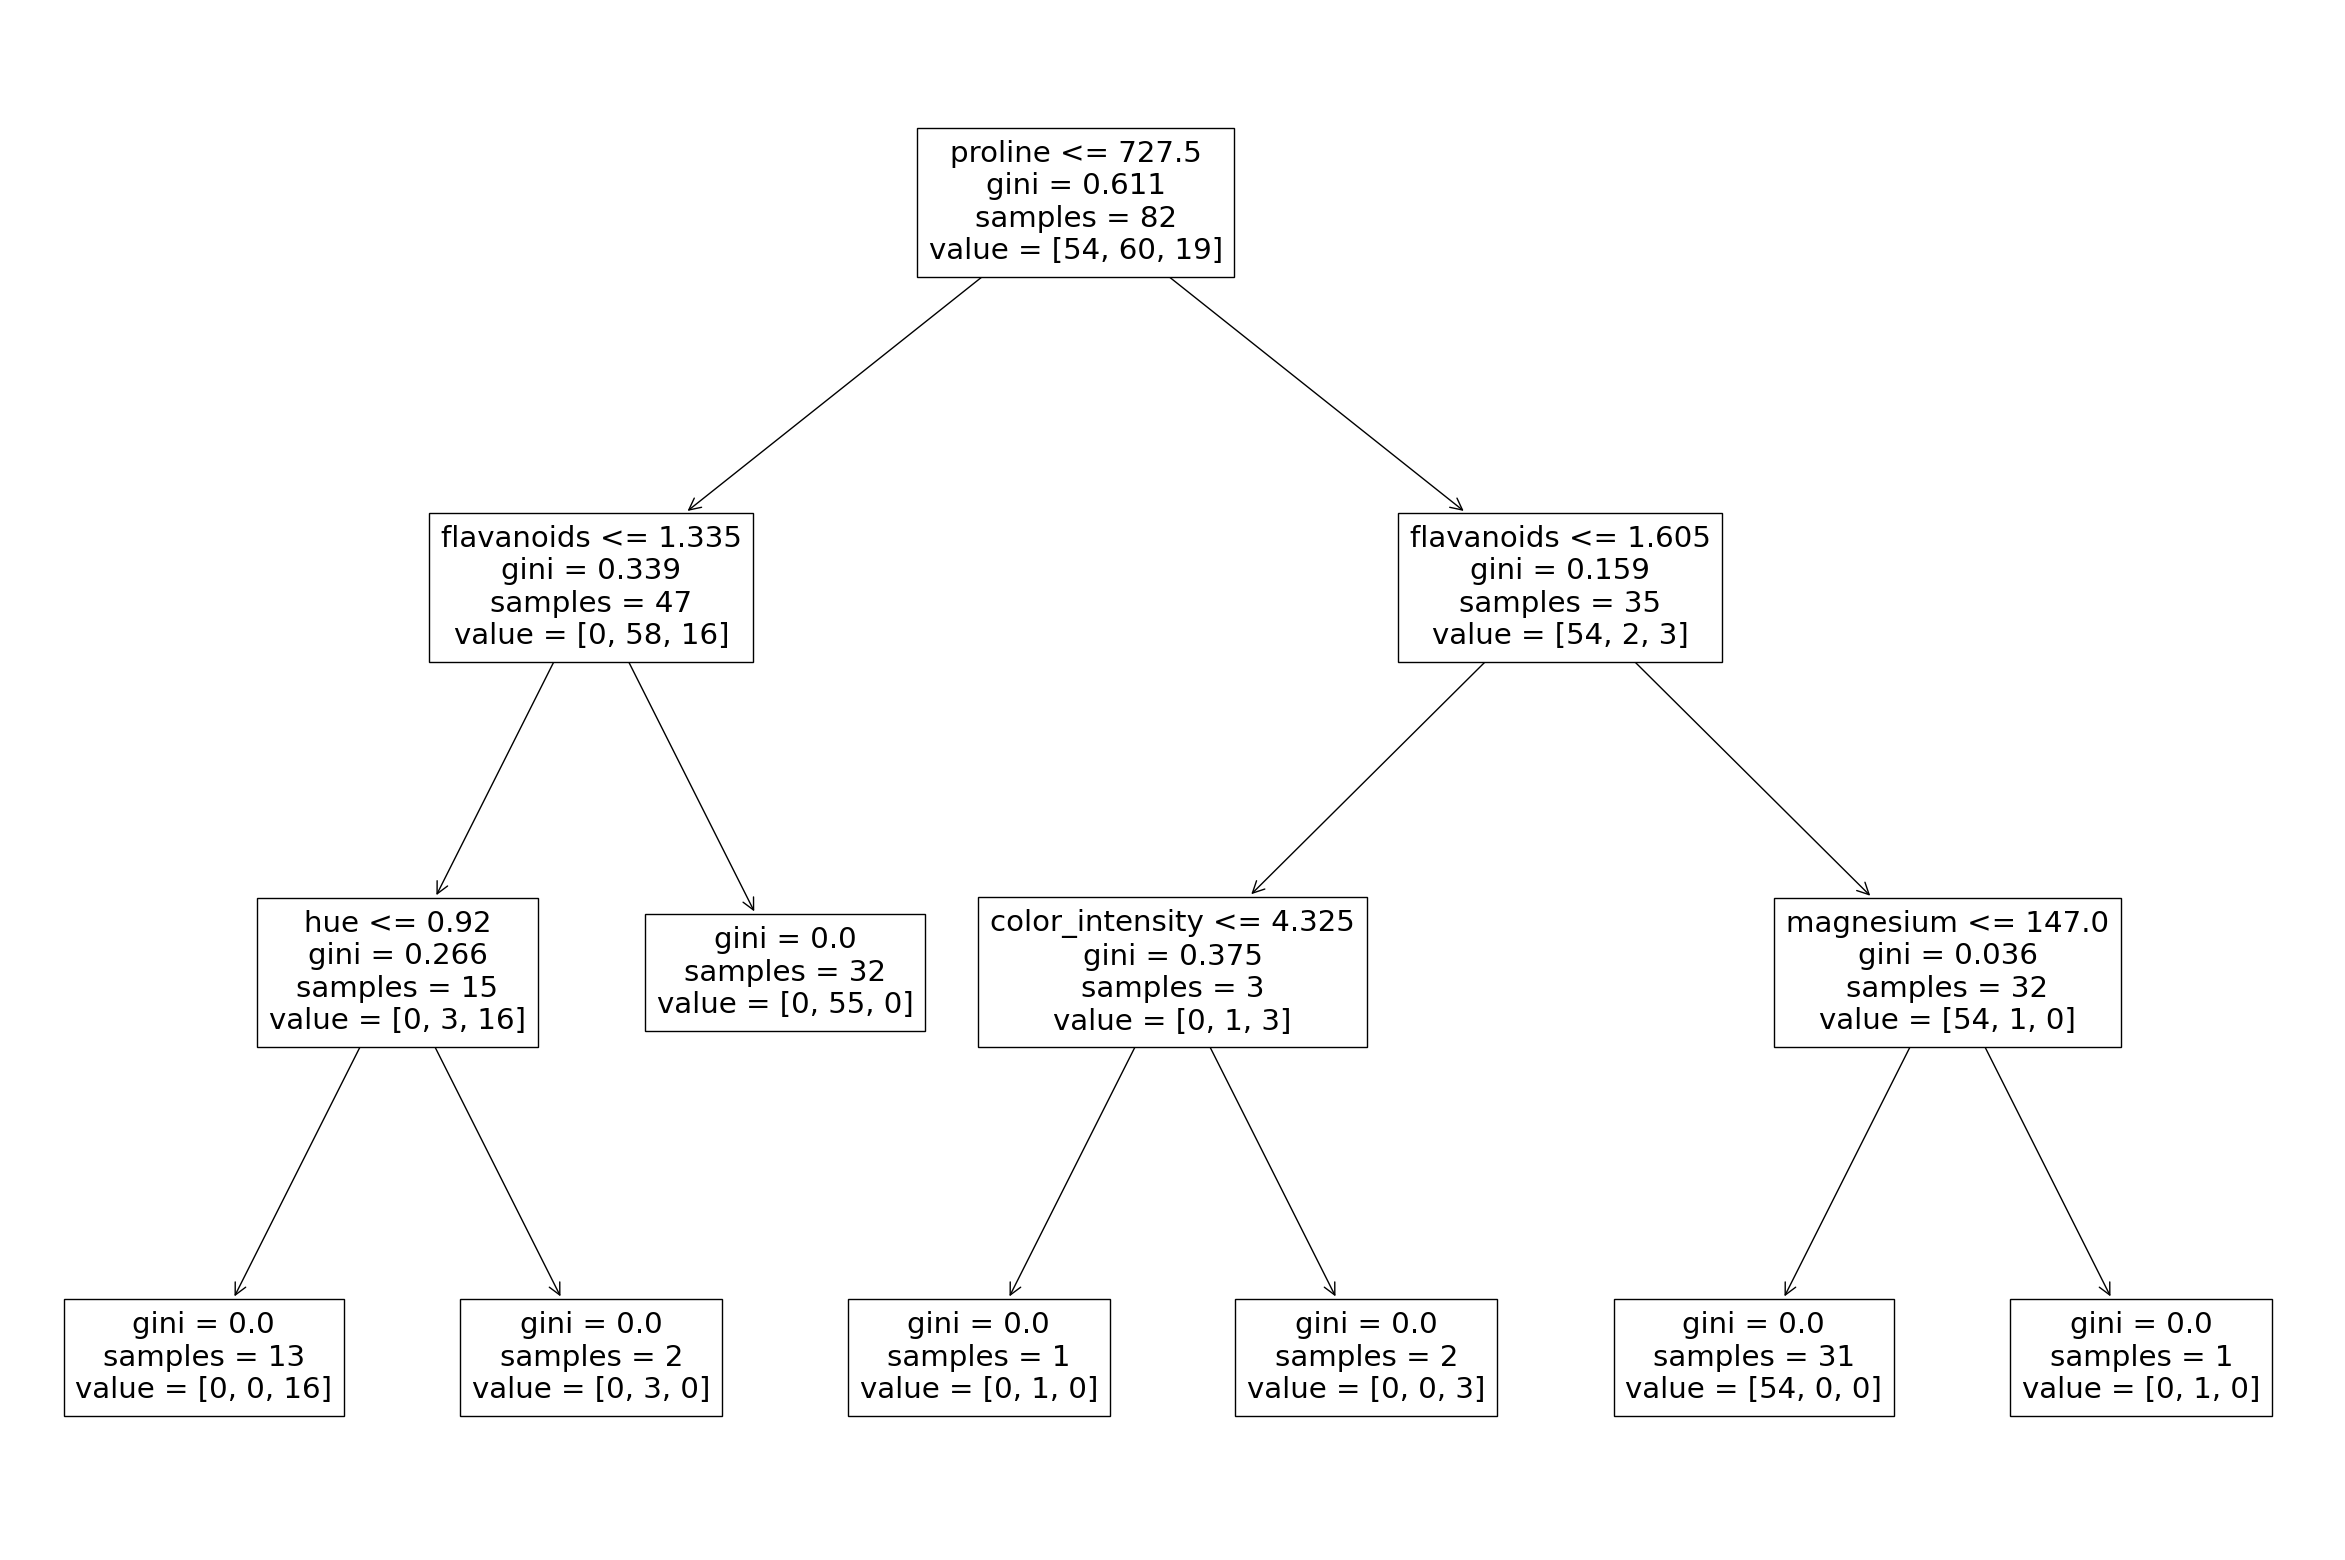

In [26]:
#Bootstrap Aggregation (bagging) is a ensembling method that attempts to resolve overfitting for classification or regression problems.
#Bagging aims to improve the accuracy and performance of machine learning algorithms.
#It does this by taking random subsets of an original dataset, with replacement, and fits either a classifier (for classification) or regressor (for regression) to each subset.

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import plot_tree

data = datasets.load_wine(as_frame = True)

X = data.data
y = data.target

print(X.head())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 22)

dtree = DecisionTreeClassifier(random_state = 22)
dtree.fit(X_train,y_train)

y_pred = dtree.predict(X_test)

print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = dtree.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = y_pred))

#For bagging we need to set the parameter n_estimators, this is the number of base classifiers that our model is going to aggregate together.
#No idea how to come up with the set though. Maybe grid search? Find out in time.

estimator_range = [2,4,6,8,10,12,14,16]

models = []
scores = []

for n_estimators in estimator_range:

    # Create bagging classifier
    clf = BaggingClassifier(n_estimators = n_estimators, random_state = 22)

    # Fit the model
    clf.fit(X_train, y_train)

    # Append the model and score to their respective list
    models.append(clf)
    scores.append(accuracy_score(y_true = y_test, y_pred = clf.predict(X_test)))

# Generate the plot of scores against number of estimators
plt.figure(figsize=(9,6))
plt.plot(estimator_range, scores)

# Adjust labels and font (to make visable)
plt.xlabel("n_estimators", fontsize = 18)
plt.ylabel("score", fontsize = 18)
plt.tick_params(labelsize = 16)

# Visualize plot
plt.show()

print("By iterating through different values for the number of estimators we can see an increase in model performance from 82.2% to 95.5%.")

#As bootstrapping chooses random subsets of observations to create classifiers, there are observations that are left out in the selection process.
#These "out-of-bag" observations can then be used to evaluate the model, similarly to that of a test set.
oob_model = BaggingClassifier(n_estimators = 12, oob_score = True,random_state = 22)

oob_model.fit(X_train, y_train)

print("Out-of-box score : ", oob_model.oob_score_)

#Generate Decision Trees from Bagging Classifier

clf = BaggingClassifier(n_estimators = 12, oob_score = True,random_state = 22)

clf.fit(X_train, y_train)

plt.figure(figsize=(30, 20))

plot_tree(clf.estimators_[0], feature_names = X.columns)